# 1. Usando os dados dessa base de dados, você irá:

### a. Importe os dados em notebook e atribua à variável chipo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')

chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### b. Selecione e mostre as 10 primeiras entrada

In [2]:
chipo[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### c. Quantas observações estão presentes neste DataSet?

In [3]:
print(f'{len(chipo)}.')

4622.


### d. Qual o número de colunas neste DataSet?

In [4]:
columns = chipo.columns

print(len(chipo.columns))

5


### e. Qual o nome de todas as colunas deste DataSet?

In [5]:
chipo.keys()


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### f. Qual o produto mais pedido? Quantas vezes ele foi pedido?

In [6]:
soma_item= chipo.groupby('item_name').quantity.sum()
nome_item = soma_item.idxmax()
quantidade = soma_item.max()

print(f'{nome_item} e foi pedido {quantidade} vezes.')

Chicken Bowl e foi pedido 761 vezes.


In [7]:
aggregation_functions = {'order_id':'first','quantity': 'sum', 'item_name': 'first', 'choice_description':'first', 'item_price': 'first'}
chipo_item = chipo.groupby(chipo['item_name']).aggregate(aggregation_functions)
quantidades = list(chipo_item['quantity'])
m = max(quantidades)
i= quantidades.index(m)
nome = list(chipo_item['item_name'])
print(f'O produto mais vendido foi {nome[i]}, pedido {m} vezes.')

O produto mais vendido foi Chicken Bowl, pedido 761 vezes.


### g. Qual foi o pedido mais pedido dentro da coluna choice_description?

In [8]:
soma_item_descri = chipo.groupby('choice_description').quantity.sum()
nome_item_descri = soma_item_descri.idxmax().strip('[]')
quantidade_descri = soma_item_descri.max()

print(f'{nome_item_descri} e foi pedido {quantidade_descri} vezes.')

Diet Coke e foi pedido 159 vezes.


In [9]:
aggregation_functions = {'order_id':'first','quantity': 'sum', 'item_name': 'first', 'choice_description':'first', 'item_price': 'first'}
chipo_choice = chipo.groupby(chipo['choice_description']).aggregate(aggregation_functions)
quantidades = list(chipo_choice['quantity'])
m = max(quantidades)
i= quantidades.index(m)
nome = list(chipo_choice['choice_description'])
print(f'O pedido mais vendido da coluna choice_description foi {nome[i]}, pedido {m} vezes.')

O pedido mais vendido da coluna choice_description foi [Diet Coke], pedido 159 vezes.


### h. Quantos itens foram pedidos no total?

In [10]:
# Total de produtos pedidos
total_pedidos = chipo.quantity.sum()
print(f'Tiveram {total_pedidos} pedidos.')

Tiveram 4972 pedidos.


In [11]:
# Quantidade de produtos individuais na base de dados
produtos_individuais = chipo.item_name.value_counts().count()
print(produtos_individuais)

50


### i. Qual foi o valor recebido para o período representado nessa base de dados?

In [12]:
chipo['item_price'] = chipo['item_price'].str.strip('$')
chipo['item_price'] = chipo['item_price'].astype(float)

chipo['item_price'].sum()

34500.16

### j. Qual a média do valor recebido por pedido?

In [13]:
soma_por_pedido = chipo.groupby(chipo['order_id']).item_price.sum()
media_por_pedido = soma_por_pedido.mean()
print(f'A média de valor recebido por pedido é de ${round(media_por_pedido,2)}.')

A média de valor recebido por pedido é de $18.81.


In [14]:
aggregation_functions = {'order_id':'first','quantity': 'sum', 'item_name': 'first', 'choice_description':'first', 'item_price': 'sum'}
chipo_pedido = chipo.groupby(chipo['order_id']).aggregate(aggregation_functions)

media = chipo_pedido['item_price'].mean()
print(f'A média de valor recebido por pedido é de ${media:.2f}.')

A média de valor recebido por pedido é de $18.81.


In [15]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### k. Quantos itens diferentes estão esgotados?

In [16]:
# O banco de dados não possui uma chave de estoque e a chave quantidade se refere à quantidade vendida.

### l. Quantos produtos custam mais de $10?

In [17]:
chipo['chipo_unidade'] = chipo['item_price']/chipo['quantity']
chipo_maior_10 = (chipo['chipo_unidade'] > 10).sum()
print(f'{chipo_maior_10} produtos.')

1034 produtos.


In [18]:
chipo['price_unity'] = chipo['item_price'] / chipo['quantity']
caros = (chipo['price_unity'] > 10)

print(f'{caros.sum()} produtos foram vendidos custando mais de $10.')

1034 produtos foram vendidos custando mais de $10.


### m. Qual o preço para cada um deles?

In [19]:
chipo_preco_maior_10 = chipo[chipo['chipo_unidade'] > 10][['item_name','chipo_unidade']]
chipo_preco_maior_10


,item_name,chipo_unidade
5,Chicken Bowl,10.98
7,Steak Burrito,11.75
13,Chicken Bowl,11.25
23,Chicken Burrito,10.98
39,Barbacoa Bowl,11.75
...,...,...
4610,Steak Burrito,11.75
4611,Veggie Burrito,11.25
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75


In [20]:
chipo10 = chipo[chipo['price_unity'] > 10][['item_name', 'price_unity']]
print(chipo10)

               item_name  price_unity
5           Chicken Bowl        10.98
7          Steak Burrito        11.75
13          Chicken Bowl        11.25
23       Chicken Burrito        10.98
39         Barbacoa Bowl        11.75
...                  ...          ...
4610       Steak Burrito        11.75
4611      Veggie Burrito        11.25
4617       Steak Burrito        11.75
4618       Steak Burrito        11.75
4619  Chicken Salad Bowl        11.25

[1034 rows x 2 columns]


### n. Ordene os itens que custam mais de $10 por ordem alfabética.

In [21]:
chipo10.sort_values(by='item_name', inplace=True)

chipo10[['item_name', 'price_unity']]

,item_name,price_unity
1175,Barbacoa Bowl,11.48
2013,Barbacoa Bowl,11.75
2073,Barbacoa Bowl,11.75
4485,Barbacoa Bowl,11.75
471,Barbacoa Bowl,11.48
...,...,...
1884,Veggie Salad Bowl,11.25
4261,Veggie Salad Bowl,11.25
295,Veggie Salad Bowl,11.25
738,Veggie Soft Tacos,11.25


### o. Quantas vezes o item mais caro foi pedido?

In [22]:
mais_caro = chipo[chipo['price_unity'] == chipo['price_unity'].max()]
qtdd_mais_caro = mais_caro['quantity'].sum()
print(f'O item mais caro foi pedido {qtdd_mais_caro} vezes.')

O item mais caro foi pedido 30 vezes.


### p. Quantas vezes uma Veggie Salad Bowl foi pedida?

In [23]:
veggie = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
total_veggie = veggie['quantity'].sum()

print(f"A Veggie Salad Bowl foi pedida {total_veggie} vezes.")

A Veggie Salad Bowl foi pedida 18 vezes.


### q. Crie um histograma com os 5 produtos mais pedidos.

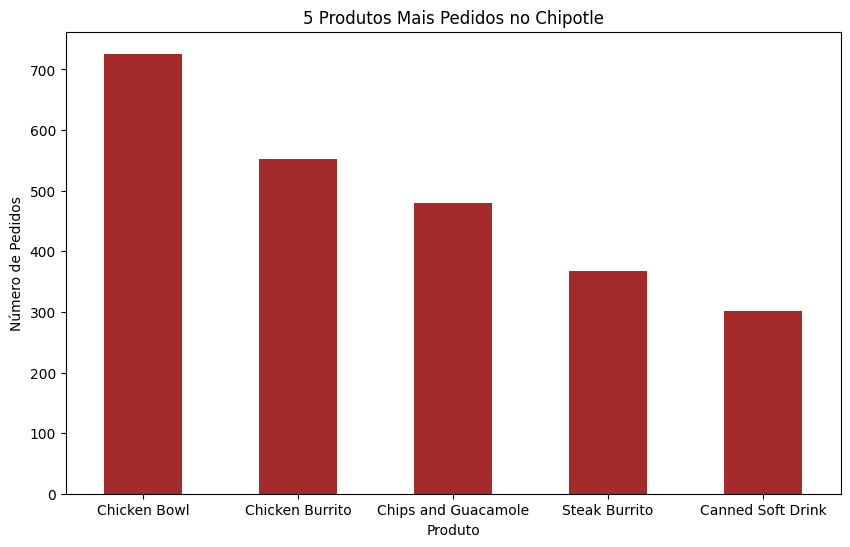

In [24]:
produtos_mais_pedidos = chipo['item_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
produtos_mais_pedidos.plot(kind='bar', color='brown')
plt.title('5 Produtos Mais Pedidos no Chipotle')
plt.xlabel('Produto')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=360)

plt.show()

### r. Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

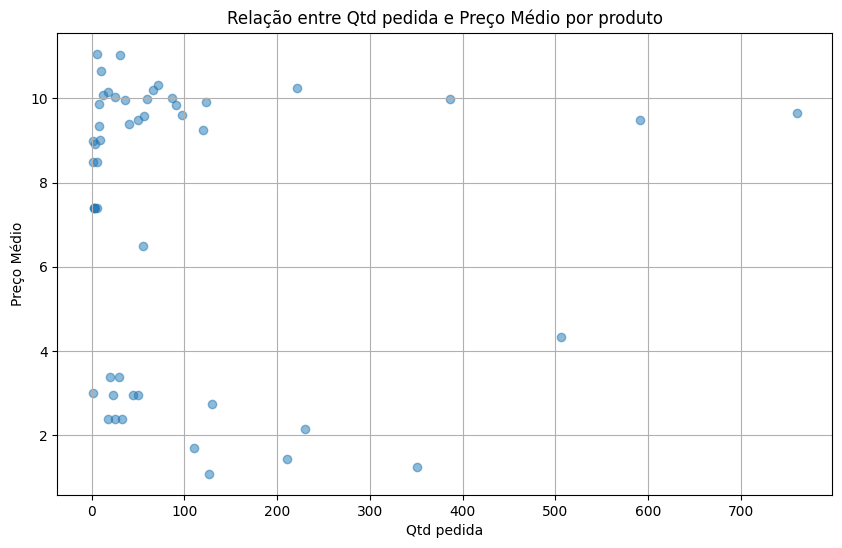

In [25]:
soma_item = chipo.groupby('item_name')['quantity'].sum()
preco_medio = chipo.groupby('item_name')['chipo_unidade'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(soma_item, preco_medio, alpha=0.5)
plt.title('Relação entre Qtd pedida e Preço Médio por produto')
plt.xlabel('Qtd pedida')
plt.ylabel('Preço Médio')
plt.grid(True)

plt.show()

### s. Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

In [26]:
coeficiente_pearson = pearsonr(soma_item,preco_medio)[0]
coeficiente_pearson

-0.0464465323128868

## 2. Utilizando o dataset fetch_california_housing do sklearn (from sklearn.datasets import fetch_california_housing)

a. Descreva as variáveis encontradas no dataset (colunas).

In [27]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plot
import seaborn as sns

In [28]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)

# Criando a coluna "MedianHouseValue" que será a variável target.

df['MedianHouseValue'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [29]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


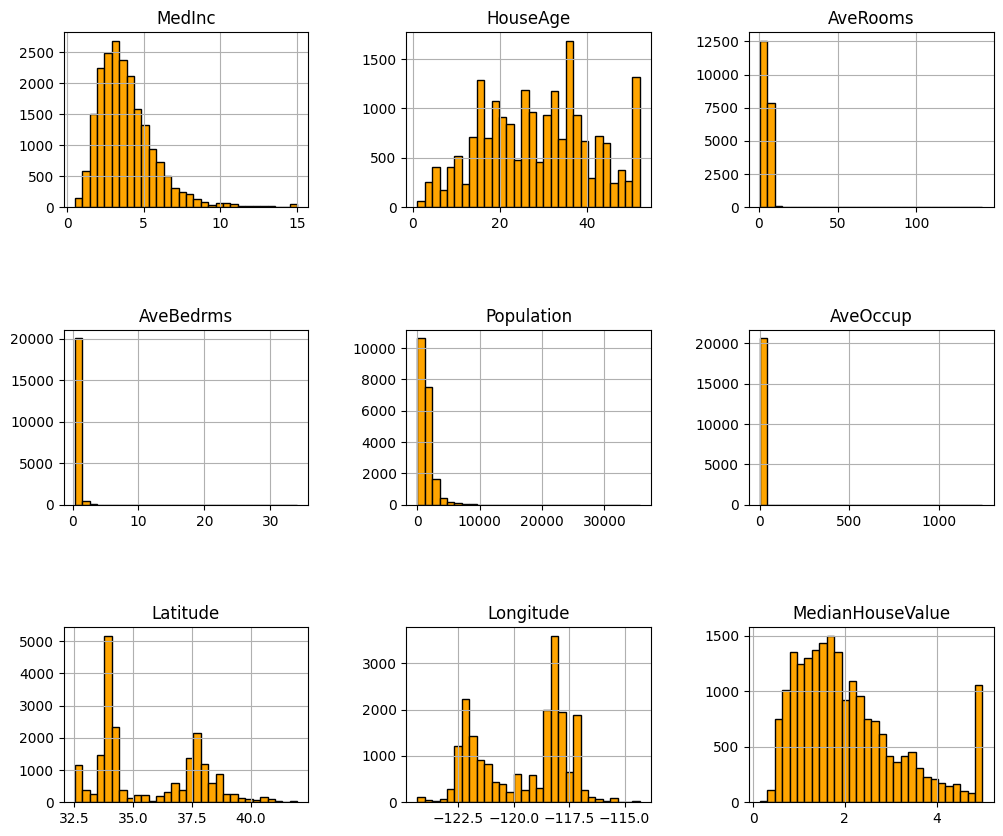

In [30]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black",color='orange')
plt.subplots_adjust(hspace=0.7, wspace=0.4)


b. Separe o dataset em treino (80%) e teste (20%) e realize os pré-processamentos necessários.

In [31]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

x = df.drop('MedianHouseValue', axis=1)
y = df.MedianHouseValue
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

c. Crie um modelo de regressão linear.

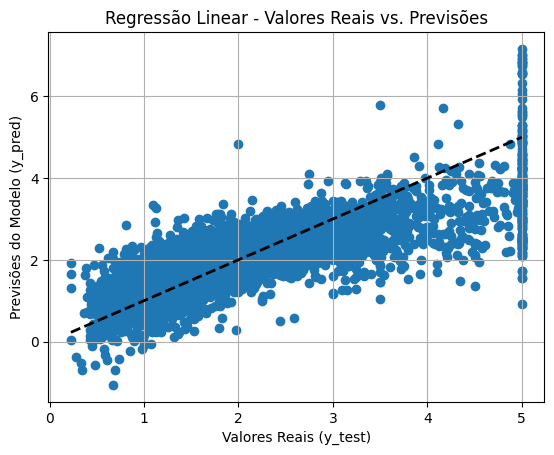

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões do Modelo (y_pred)")
plt.title("Regressão Linear - Valores Reais vs. Previsões")
plt.grid(True)

# Adicionar linha de tendência (linha de 45 graus)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

d. Mostre o desempenho do seu modelo através do RMSE, MAE e R2.

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 0.71
MAE: 0.53
R2: 0.61


e. Quais suas sugestões para melhorar o modelo?

In [35]:
df['MedInc'] = np.log10(df['MedInc'])

In [36]:
df['Population'] = np.log10(df['Population'])

In [37]:
df['MedianHouseValue'] = np.log10(df['MedianHouseValue'])

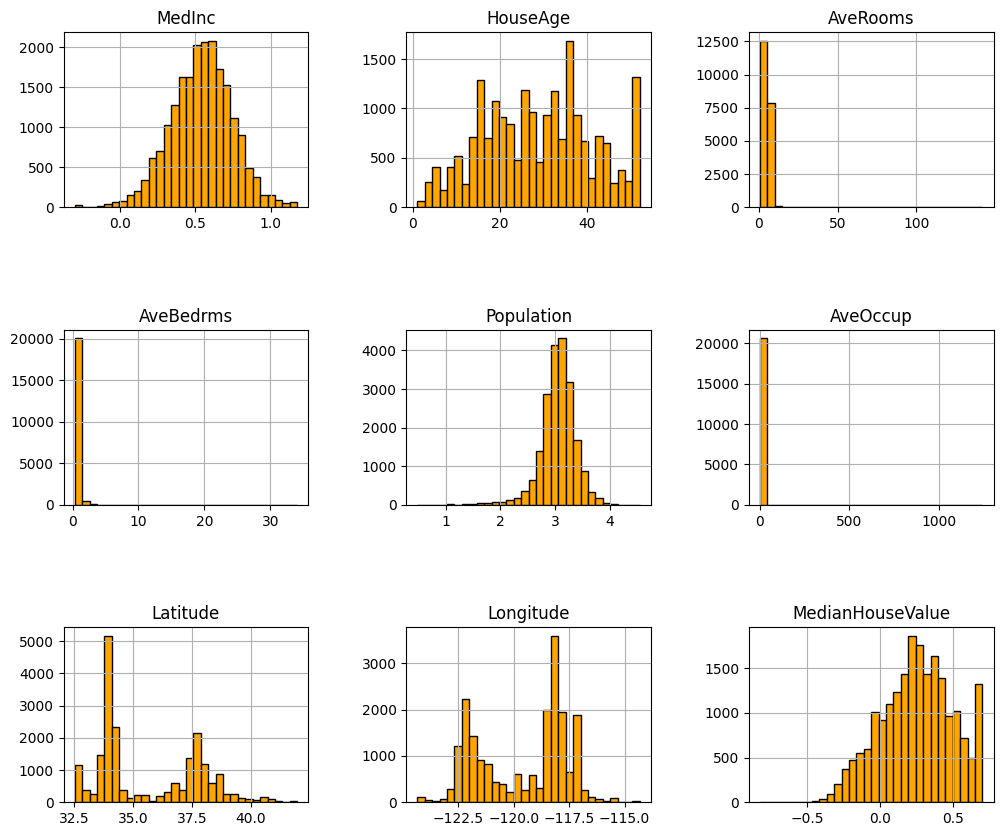

In [38]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black",color='orange')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [39]:
x = df.drop('MedianHouseValue', axis=1)
y = df.MedianHouseValue
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

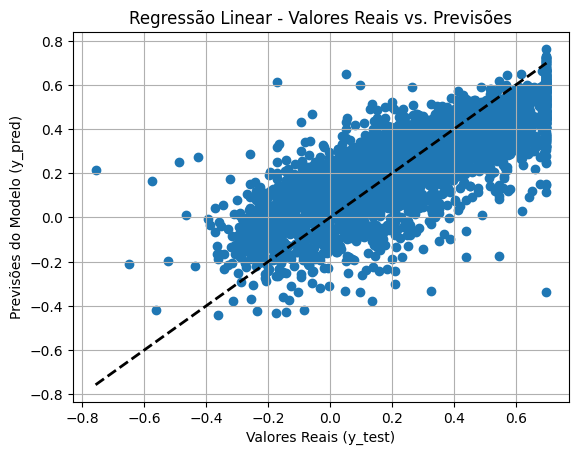

In [40]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões do Modelo (y_pred)")
plt.title("Regressão Linear - Valores Reais vs. Previsões")
plt.grid(True)

# Adicionar linha de tendência (linha de 45 graus)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

In [41]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")


RMSE: 0.15
MAE: 0.12
R2: 0.63


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a305920-c11e-4218-8fb4-f71219599d10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>